UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, age progression/regression, landmark localization, etc.

The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg

[age] is an integer from 0 to 116, indicating the age
[gender] is either 0 (male) or 1 (female)
[race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
[date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %%bash
# ls ../input/utkface_aligned_cropped
# # it seems crop_part1 conists of subset of data contained in UTKFace so we won't be using it.

In [3]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


**Constants**

In [4]:
DATA_DIR = "./UTKFace"
TEST_DIR = "./TEST"
TRAIN_TEST_SPLIT = 0.7
IM_WIDTH = IM_HEIGHT = 200
ID_GENDER_MAP = {0: 'male', 1: 'female'}
GENDER_ID_MAP = dict((g, i) for i, g in ID_GENDER_MAP.items())
ID_RACE_MAP = {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'others'}
RACE_ID_MAP = dict((r, i) for i, r in ID_RACE_MAP.items())
ID_AGE_MAP ={0: '-18', 1:'18-24', 2:'25-34', 3:'35-44', 4:'45-54', 5:'55-64', 6:'65-75',7:'75+'}
AGE_ID_MAP = dict((a, i) for i, a in ID_AGE_MAP.items())

ID_GENDER_MAP, GENDER_ID_MAP, ID_RACE_MAP, RACE_ID_MAP, ID_AGE_MAP, AGE_ID_MAP

({0: 'male', 1: 'female'},
 {'male': 0, 'female': 1},
 {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'others'},
 {'white': 0, 'black': 1, 'asian': 2, 'indian': 3, 'others': 4},
 {0: '-18',
  1: '18-24',
  2: '25-34',
  3: '35-44',
  4: '45-54',
  5: '55-64',
  6: '65-75',
  7: '75+'},
 {'-18': 0,
  '18-24': 1,
  '25-34': 2,
  '35-44': 3,
  '45-54': 4,
  '55-64': 5,
  '65-75': 6,
  '75+': 7})

In [5]:
def parse_filepath(filepath):
    try:
        path, filename = os.path.split(filepath)
        filename, ext = os.path.splitext(filename)
        age, gender, race, _ = filename.split("_")
        return int(age), ID_GENDER_MAP[int(gender)], ID_RACE_MAP[int(race)]
    except Exception as e:
        print(filepath)
        return None, None, None

In [6]:
# create a pandas data frame of images, age, gender and race
files = glob.glob(os.path.join(DATA_DIR, "*.jpg"))

# Total of 64 pictures
test_files = glob.glob(os.path.join(TEST_DIR,"*.jpg"))

In [7]:
attributes = list(map(parse_filepath, files))
test_attributes = list(map(parse_filepath, test_files))

In [8]:
df = pd.DataFrame(attributes)
df['file'] = files
df.columns = ['age', 'gender', 'race', 'file']
df = df.dropna()
df.sample(10)

age  gender    race                                             file
4442    24  female   white  ./UTKFace\24_1_0_20170116172723427.jpg.chip.jpg
11640   32    male   white  ./UTKFace\32_0_0_20170117123734515.jpg.chip.jpg
15055    3    male   white   ./UTKFace\3_0_0_20170110212748579.jpg.chip.jpg
8801    28    male   black  ./UTKFace\28_0_1_20170117022129599.jpg.chip.jpg
15495   40    male   white  ./UTKFace\40_0_0_20170117203820721.jpg.chip.jpg
2156     1    male  others   ./UTKFace\1_0_4_20161221195047839.jpg.chip.jpg
16879   45  female   white  ./UTKFace\45_1_0_20170117170556859.jpg.chip.jpg
2579     1  female  indian   ./UTKFace\1_1_3_20161220144637487.jpg.chip.jpg
17234   47  female   white  ./UTKFace\47_1_0_20170109220604136.jpg.chip.jpg
13132   35    male   black  ./UTKFace\35_0_1_20170117181203308.jpg.chip.jpg

In [9]:
df_test = pd.DataFrame(test_attributes)
df_test['file'] = test_files
df_test.columns = ['age', 'gender', 'race', 'file']
df_test.sample(4)

age  gender   race                                          file
55   52    male  white  ./TEST\52_0_0_20170117161004278.jpg.chip.jpg
60   55    male  asian  ./TEST\55_0_2_20170116172931526.jpg.chip.jpg
10   25    male  white                         ./TEST\25_0_0_005.jpg
6    24  female  white  ./TEST\24_1_0_20170104021019292.jpg.chip.jpg

In [10]:
print(df.shape)
print(df_test.shape)

(23679, 4)
(64, 4)


# Exploratory analysis

In [11]:
df.describe()

age
count  23679.000000
mean      33.297605
std       19.887057
min        1.000000
25%       23.000000
50%       29.000000
75%       45.000000
max      116.000000

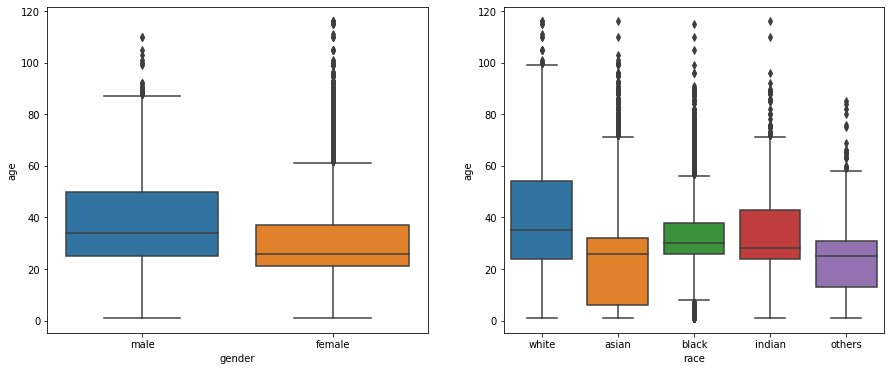

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
a = sns.boxplot(data=df, x='gender', y='age', ax=ax1)
a = sns.boxplot(data=df, x='race', y='age', ax=ax2)

From the plot we can see that most of people are within 10 and 55 years of age. Most probably, we'll discard the dataset for rest of the ages.

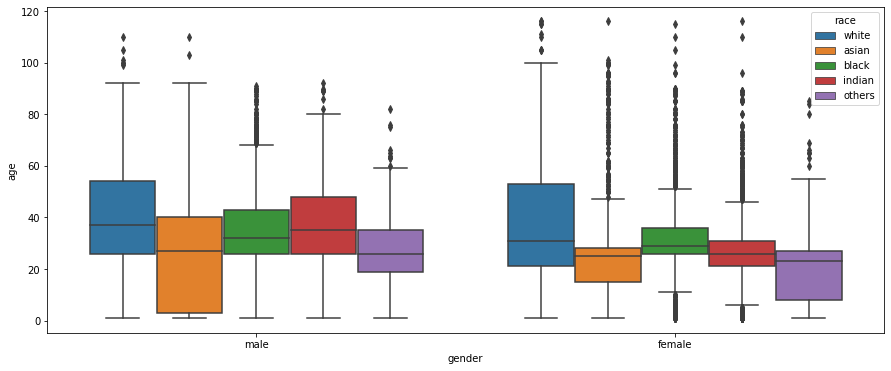

In [13]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='gender', y='age', hue='race')

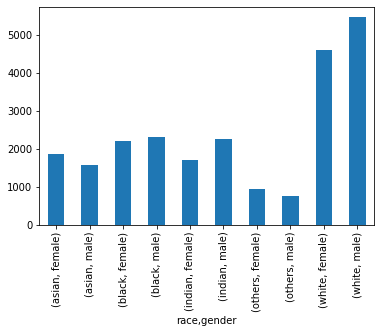

In [14]:
df.groupby(by=['race', 'gender'])['age'].count().plot(kind='bar')

It turns out that there are many images of *white male* and *while female*. images from *others* category are very less in number compared to rest of the categories especially *white* category.
Let's analyze our data from *age* perspective.

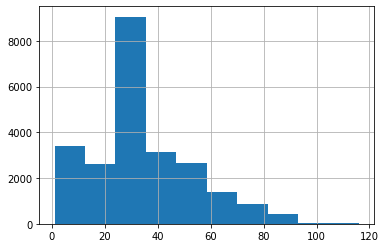

In [15]:
df['age'].hist()

In [16]:
#Getting rid of under 7 years old. 
df = df[df['age'] > 6]  

#Keeping a random sampling of 50% of the white images. 
white_keep = df.loc[df['race']=='white'].sample(frac=0.5, replace=False, random_state=1)
df = pd.concat([df.loc[df['race']!='white'], white_keep], axis = 0)

In [17]:
def make_age_class(dataFrame):
    age_class = []
    for i in dataFrame['age']:
        i = int(i)
        if i < 18:
            age_class.append('-18')
        elif (18<=i<=24):
            age_class.append('18-24')
        elif (25<=i<=34):
            age_class.append('25-34')
        elif (35<=i<=44):
            age_class.append('35-44')
        elif (45<=i<=54):
            age_class.append('45-54')
        elif (55<=i<=64):
            age_class.append('55-64')
        elif (65<=i<=75):
            age_class.append('65-75')
        else:
            age_class.append('75+')
    return(age_class)

In [18]:
     
# creating age class
# Age groups = [‘-17',’18-24', '25-34', '35-44','45-54', '55-64', '65-75', '75+’]
df['age_class'] = make_age_class(df)
# changing column orders
df = df[['age_class','gender', 'race', 'file', 'age']]

df.sample(10)

age_class  gender    race  \
4573      18-24  female   black   
18027     45-54    male   asian   
8719      25-34    male   black   
14604     35-44    male  others   
3244      18-24  female  indian   
13096     35-44    male   black   
18510     45-54    male  indian   
16          75+  female   white   
3311      18-24  female  others   
3650      18-24  female  indian   

                                                   file  age  
4573    ./UTKFace\24_1_1_20170113003752421.jpg.chip.jpg   24  
18027   ./UTKFace\50_0_2_20170116191949008.jpg.chip.jpg   50  
8719    ./UTKFace\28_0_1_20170113161237182.jpg.chip.jpg   28  
14604   ./UTKFace\38_0_4_20170117151031427.jpg.chip.jpg   38  
3244    ./UTKFace\21_1_3_20170104222522503.jpg.chip.jpg   21  
13096   ./UTKFace\35_0_1_20170117121610224.jpg.chip.jpg   35  
18510   ./UTKFace\52_0_3_20170119205713544.jpg.chip.jpg   52  
16     ./UTKFace\105_1_0_20170112213021902.jpg.chip.jpg  105  
3311    ./UTKFace\21_1_4_20170117193741701.jpg.chip.jpg   21  
3650    ./UTKFace\22_1_3_20170119153416689.jpg.chip.jpg   22

In [19]:
# creating age class
# Age groups = [‘-17',’18-24', '25-34', '35-44','45-54', '55-64', '65-75', '75+’]
df_test['age_class'] = make_age_class(df_test)
# changing column orders
df_test = df_test[['age_class','gender', 'race', 'file', 'age']]

df_test.sample(10)

age_class  gender    race                                          file  \
56     45-54  female   black  ./TEST\52_1_1_20170105003356704.jpg.chip.jpg   
26     25-34  female   white                         ./TEST\28_1_0_000.jpg   
16     25-34  female   asian  ./TEST\25_1_2_20170116175320721.jpg.chip.jpg   
31     25-34    male   white                         ./TEST\30_0_0_000.jpg   
42     35-44    male   asian                         ./TEST\35_0_2_000.jpg   
5      18-24    male  indian                         ./TEST\23_0_3_001.jpg   
20     25-34    male   asian  ./TEST\27_0_2_20170116172528863.jpg.chip.jpg   
8      25-34    male   white                         ./TEST\25_0_0_002.jpg   
63     65-75    male   black  ./TEST\67_0_1_20170120224828928.jpg.chip.jpg   
40     35-44    male   white                         ./TEST\35_0_0_002.jpg   

    age  
56   52  
26   28  
16   25  
31   30  
42   35  
5    23  
20   27  
8    25  
63   67  
40   35

In [20]:
df['age'].describe()

count    16523.000000
mean        35.906312
std         16.830307
min          7.000000
25%         26.000000
50%         30.000000
75%         45.000000
max        116.000000
Name: age, dtype: float64

In [21]:
# df = df[(df['age'] > 10) & (df['age'] < 65)]

# Data prep

80% Train 20% Valid 64 pictures for our test

In [22]:
# stratified shuffle split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_index, valid_index in split.split(df, df['gender']):
    print("TRAIN:", train_index, "TEST:", valid_index)
    train_idx = train_index
    valid_idx = valid_index

TRAIN: [ 9107 10410   376 ...  8937 12317  7244] TEST: [ 2358 12425  9919 ...  3500   906  8762]


In [23]:
# Concatenate df and test df for getting test index purpose
df = pd.concat([df, df_test], axis=0, sort=False).reset_index(drop=True)

In [24]:
# get last 64 indexes
test_idx = np.array(df.iloc[-64:].index.values.tolist())

In [25]:
df['gender_id'] = df['gender'].map(lambda gender: GENDER_ID_MAP[gender])
df['race_id'] = df['race'].map(lambda race: RACE_ID_MAP[race])
df['age_id'] = df['age_class'].map(lambda age_class: AGE_ID_MAP[age_class])

len(train_idx), len(valid_idx), len(test_idx)

(13218, 3305, 64)

In [26]:
df.sample(10)

age_class  gender    race  \
2993      25-34    male   black   
1274      18-24  female  indian   
613       18-24    male   black   
5851      25-34  female   black   
13034       -18  female   white   
553       18-24    male   black   
12620     45-54    male   white   
8796      35-44    male   asian   
9075      35-44    male   black   
13917       -18    male   white   

                                                  file  age  gender_id  \
2993   ./UTKFace\26_0_1_20170116205006069.jpg.chip.jpg   26          0   
1274   ./UTKFace\22_1_3_20170109131950179.jpg.chip.jpg   22          1   
613    ./UTKFace\20_0_1_20170113133041441.jpg.chip.jpg   20          0   
5851   ./UTKFace\29_1_1_20170117165555736.jpg.chip.jpg   29          1   
13034   ./UTKFace\8_1_0_20170109203433105.jpg.chip.jpg    8          1   
553    ./UTKFace\19_0_1_20170114025936564.jpg.chip.jpg   19          0   
12620  ./UTKFace\45_0_0_20170116235729518.jpg.chip.jpg   45          0   
8796   ./UTKFace\40_0_2_20170116162129430.jpg.chip.jpg   40          0   
9075   ./UTKFace\42_0_1_20170113183523861.jpg.chip.jpg   42          0   
13917  ./UTKFace\13_0_0_20170110232526929.jpg.chip.jpg   13          0   

       race_id  age_id  
2993         1       2  
1274         3       1  
613          1       1  
5851         1       2  
13034        0       0  
553          1       1  
12620        0       4  
8796         2       3  
9075         1       3  
13917        0       0

In [27]:
from keras.utils import to_categorical
from PIL import Image

def get_data_generator(df, indices, for_training, batch_size=16):
    images, ages, races, genders = [], [], [], []
    while True:
        for i in indices:
            r = df.iloc[i]
            file, age_class, race, gender = r['file'], r['age_id'], r['race_id'], r['gender_id']
            im = Image.open(file)
            im = im.resize((IM_WIDTH, IM_HEIGHT))
            im = np.array(im) / 255.0
            images.append(im)
            ages.append(to_categorical(age_class, len(AGE_ID_MAP)))
            races.append(to_categorical(race, len(RACE_ID_MAP)))
            genders.append(to_categorical(gender, 2))
            if len(images) >= batch_size:
                yield np.array(images), [np.array(ages), np.array(races), np.array(genders)]
                images, ages, races, genders = [], [], [], []
        if not for_training:
            break

Using TensorFlow backend.


# Model training

## Resnet

In [29]:
from keras.applications import ResNet50
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(200, 200, 3))

Instructions for updating:
Colocations handled automatically by placer.


C:\Anaconda3\envs\motionFlow\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [65]:
# RESNET

def conv_block(inp, filters=32, bn=True, pool=True):
    layer = Conv2D(filters=filters, kernel_size=3, activation='relu')(inp)
    if bn:
        layer = BatchNormalization()(layer)
    if pool:
        layer = MaxPool2D()(layer)
    return layer

input_layer = Input(shape=(IM_HEIGHT, IM_WIDTH, 3))
layer = conv_base(input_layer)
bottleneck = GlobalMaxPool2D()(layer)


# for age calculation
layer = Dense(units=128, activation='relu')(bottleneck)
age_output = Dense(units=len(AGE_ID_MAP), activation='softmax', name='age_output')(layer)

# for race prediction
layer = Dense(units=128, activation='relu')(bottleneck)
race_output = Dense(units=len(RACE_ID_MAP), activation='softmax', name='race_output')(layer)

# for gender prediction
layer = Dense(units=128, activation='relu')(bottleneck)
gender_output = Dense(units=len(GENDER_ID_MAP), activation='softmax', name='gender_output')(layer)


model = Model(inputs=input_layer, outputs=[age_output, race_output, gender_output])
model.compile(optimizer='adam', 
              loss={'age_output': 'categorical_crossentropy', 'race_output': 'categorical_crossentropy', 'gender_output': 'categorical_crossentropy'},
              loss_weights={'age_output': 2., 'race_output': 1.5, 'gender_output': 1.},
              metrics={'age_output': 'accuracy', 'race_output': 'accuracy', 'gender_output': 'accuracy'})
# model.summary()

In [66]:
conv_base.trainable = False

In [67]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
resnet50 (Model)                (None, 7, 7, 2048)   23587712    input_6[0][0]                    
__________________________________________________________________________________________________
global_max_pooling2d_5 (GlobalM (None, 2048)         0           resnet50[2][0]                   
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 128)          262272      global_max_pooling2d_5[0][0]     
__________________________________________________________________________________________________
dense_14 (

### OUR MODEL

### Leaky ReLU

In [37]:
from keras.layers import LeakyReLU

def conv_block(inp, filters=32, bn=True, pool=True, activation = True):
    layer = Conv2D(filters=filters, kernel_size=3)(inp)
    if bn:
        layer = BatchNormalization()(layer)
    if pool:
        layer = MaxPool2D()(layer)
    if activation:
        layer = LeakyReLU(alpha=0.05)(layer)
    return layer

input_layer = Input(shape=(IM_HEIGHT, IM_WIDTH, 3))
layer = conv_block(input_layer, filters=32, bn=False, pool=False)
layer = conv_block(layer, filters=32*3)
layer = conv_block(layer, filters=32*4)
layer = conv_block(layer, filters=32*5)
layer = conv_block(layer, filters=32*6)
layer = conv_block(layer, filters=32*6)
bottleneck = GlobalMaxPool2D()(layer)


# for age calculation
layer = Dense(units=128, activation='relu')(bottleneck)
layer = Dropout(0.5)(layer)
age_output = Dense(units=len(AGE_ID_MAP), activation='softmax', name='age_output')(layer)

# for race prediction
layer = Dense(units=128, activation='relu')(bottleneck)
layer = Dropout(0.5)(layer)
race_output = Dense(units=len(RACE_ID_MAP), activation='softmax', name='race_output')(layer)

# for gender prediction
layer = Dense(units=128, activation='relu')(bottleneck)
layer = Dropout(0.5)(layer)
gender_output = Dense(units=len(GENDER_ID_MAP), activation='softmax', name='gender_output')(layer)


model = Model(inputs=input_layer, outputs=[age_output, race_output, gender_output])

model.compile(optimizer='adam', 
              loss={'age_output': 'categorical_crossentropy', 'race_output': 'categorical_crossentropy', 'gender_output': 'categorical_crossentropy'},
              loss_weights={'age_output': 2., 'race_output': 1.5, 'gender_output': 1.},
              metrics={'age_output': 'accuracy', 'race_output': 'accuracy', 'gender_output': 'accuracy'})
# model.summary()

In [35]:
def conv_block(inp, filters=32, bn=True, pool=True):
    layer = Conv2D(filters=filters, kernel_size=3, activation='relu')(inp)
    if bn:
        layer = BatchNormalization()(layer)
    if pool:
        layer = MaxPool2D()(layer)
    return layer

input_layer = Input(shape=(IM_HEIGHT, IM_WIDTH, 3))
layer = conv_block(input_layer, filters=32, bn=False, pool=False)
layer = conv_block(layer, filters=32*3)
layer = conv_block(layer, filters=32*4)
layer = conv_block(layer, filters=32*5)
layer = conv_block(layer, filters=32*6)
layer = conv_block(layer, filters=32*6)
bottleneck = GlobalMaxPool2D()(layer)


# for age calculation
layer = Dense(units=128, activation='relu')(bottleneck)
layer = Dropout(0.5)(layer)
age_output = Dense(units=len(AGE_ID_MAP), activation='softmax', name='age_output')(layer)

# for race prediction
layer = Dense(units=128, activation='relu')(bottleneck)
layer = Dropout(0.5)(layer)
race_output = Dense(units=len(RACE_ID_MAP), activation='softmax', name='race_output')(layer)

# for gender prediction
layer = Dense(units=128, activation='relu')(bottleneck)
layer = Dropout(0.5)(layer)
gender_output = Dense(units=len(GENDER_ID_MAP), activation='softmax', name='gender_output')(layer)


model = Model(inputs=input_layer, outputs=[age_output, race_output, gender_output])

model.compile(optimizer='adam', 
              loss={'age_output': 'categorical_crossentropy', 'race_output': 'categorical_crossentropy', 'gender_output': 'categorical_crossentropy'},
              loss_weights={'age_output': 2., 'race_output': 1.5, 'gender_output': 1.},
              metrics={'age_output': 'accuracy', 'race_output': 'accuracy', 'gender_output': 'accuracy'})
# model.summary()

In [38]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 198, 198, 32) 896         input_5[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_7 (LeakyReLU)       (None, 198, 198, 32) 0           conv2d_13[0][0]                  
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 196, 196, 96) 27744       leaky_re_lu_7[0][0]              
__________________________________________________________________________________________________
batch_norm

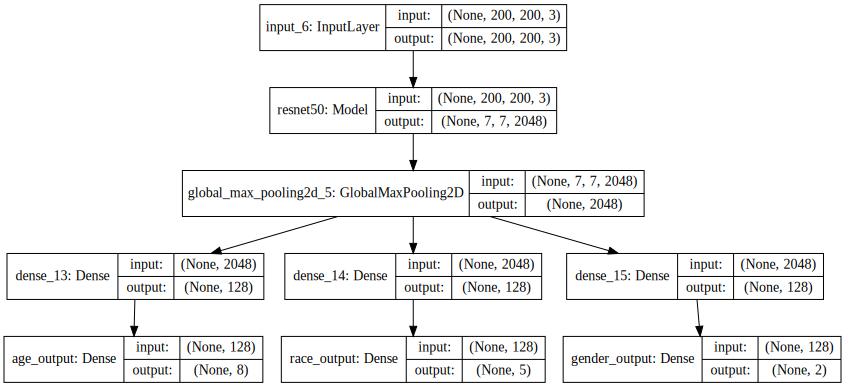

In [68]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [69]:
plot_model(model, to_file='ResNet50.png')

In [49]:
from keras.callbacks import ModelCheckpoint

batch_size = 16 #64
valid_batch_size = 16 #64
train_gen = get_data_generator(df, train_idx, for_training=True, batch_size=batch_size)
valid_gen = get_data_generator(df, valid_idx, for_training=True, batch_size=valid_batch_size)

callbacks = [
    ModelCheckpoint("./model_checkpoint", monitor='val_loss')
]

history = model.fit_generator(train_gen,
                    steps_per_epoch=len(train_idx)//batch_size,
                    epochs=10,
                    callbacks=callbacks,
                    validation_data=valid_gen,
                    validation_steps=len(valid_idx)//valid_batch_size)
                    


Epoch 1/10
826/826 [==============================] - 153s 186ms/step - loss: 4.1967 - age_output_loss: 1.3955 - race_output_loss: 0.7848 - gender_output_loss: 0.2286 - age_output_acc: 0.4314 - race_output_acc: 0.7271 - gender_output_acc: 0.9149 - val_loss: 4.1039 - val_age_output_loss: 1.3965 - val_race_output_loss: 0.7341 - val_gender_output_loss: 0.2099 - val_age_output_acc: 0.4375 - val_race_output_acc: 0.7412 - val_gender_output_acc: 0.9190
Epoch 2/10
826/826 [==============================] - 154s 187ms/step - loss: 3.9968 - age_output_loss: 1.3484 - race_output_loss: 0.7329 - gender_output_loss: 0.2007 - age_output_acc: 0.4420 - race_output_acc: 0.7470 - gender_output_acc: 0.9254 - val_loss: 4.1305 - val_age_output_loss: 1.3731 - val_race_output_loss: 0.7511 - val_gender_output_loss: 0.2577 - val_age_output_acc: 0.4448 - val_race_output_acc: 0.7330 - val_gender_output_acc: 0.8902
Epoch 3/10
826/826 [==============================] - 156s 189ms/step - loss: 3.8083 - age_output_lo

Saving figure model_accuracy


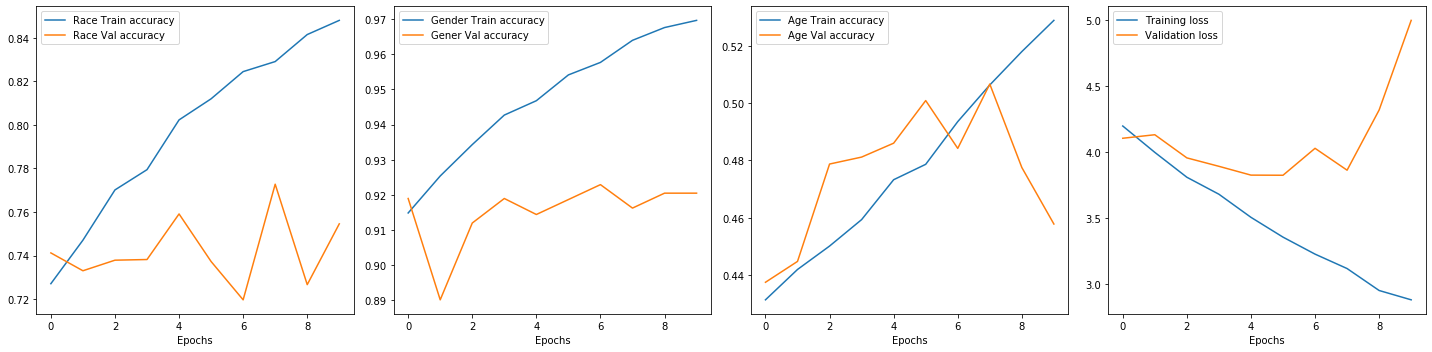

In [50]:
def  plot_train_history(history):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].plot(history.history['race_output_acc'], label='Race Train accuracy')
    axes[0].plot(history.history['val_race_output_acc'], label='Race Val accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].legend()
    
    axes[1].plot(history.history['gender_output_acc'], label='Gender Train accuracy')
    axes[1].plot(history.history['val_gender_output_acc'], label='Gener Val accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].legend()

    axes[2].plot(history.history['age_output_acc'], label='Age Train accuracy')
    axes[2].plot(history.history['val_age_output_acc'], label='Age Val accuracy')
    axes[2].set_xlabel('Epochs')
    axes[2].legend()  

    axes[3].plot(history.history['loss'], label='Training loss')
    axes[3].plot(history.history['val_loss'], label='Validation loss')
    axes[3].set_xlabel('Epochs')
    axes[3].legend()

plot_train_history(history)
save_fig('model_accuracy')

In [51]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=32) #128
dict(zip(model.metrics_names, model.evaluate_generator(test_gen, steps=len(test_idx)//32)))


{'loss': 5.628741502761841,
 'age_output_loss': 1.7028835713863373,
 'race_output_loss': 1.2270163893699646,
 'gender_output_loss': 0.3824498951435089,
 'age_output_acc': 0.5,
 'race_output_acc': 0.65625,
 'gender_output_acc': 0.84375}

In [52]:
batchSize = 32

race_pred_list, gender_pred_list, age_pred_list = [],[],[] 
x_test_list, age_true_list, race_true_list, gender_true_list = [], [], [], []

test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=batchSize) #128
for i in range(2):
    x_test, (age_true, race_true, gender_true) = next(test_gen)
    age_pred, race_pred, gender_pred = model.predict_on_batch(x_test)
    race_true, gender_true, age_true= race_true.argmax(axis=-1), gender_true.argmax(axis=-1), age_true.argmax(axis=-1)
    race_pred, gender_pred, age_pred = race_pred.argmax(axis=-1), gender_pred.argmax(axis=-1), age_pred.argmax(axis=-1)
    
    # append to the lists (x_test and true)
    x_test_list.append(x_test)
    race_true_list.append(race_true)
    gender_true_list.append(gender_true)
    age_true_list.append(age_true)
    
    # append to the lists (pred)
    race_pred_list.append(race_pred)
    gender_pred_list.append(gender_pred)
    age_pred_list.append(age_pred)
    

# multiple nested lists into 1
x_test_list = np.concatenate(x_test_list)
race_true_list = np.concatenate(race_true_list)
gender_true_list = np.concatenate(gender_true_list) 
age_true_list = np.concatenate(age_true_list) 

race_pred_list = np.concatenate(race_pred_list)
gender_pred_list = np.concatenate(gender_pred_list) 
age_pred_list = np.concatenate(age_pred_list) 



race_true_list = np.array(list(map(lambda race: ID_RACE_MAP[race], race_true_list)))
gender_true_list = np.array(list(map(lambda gender: ID_GENDER_MAP[gender], gender_true_list)))
age_true_list = np.array(list(map(lambda age: ID_AGE_MAP[age], age_true_list)))

race_pred_list = np.array(list(map(lambda race: ID_RACE_MAP[race], race_pred_list)))
gender_pred_list = np.array(list(map(lambda gender: ID_GENDER_MAP[gender], gender_pred_list)))
age_pred_list = np.array(list(map(lambda age: ID_AGE_MAP[age], age_pred_list)))

In [53]:
# test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=32) #128
# x_test, (age_true, race_true, gender_true) = next(test_gen)
# age_pred, race_pred, gender_pred = model.predict_on_batch(x_test)

In [54]:
def makeJSON1(keys,races,genders,ages):
    def helper(isface,age,gender,race):
        if isface:
            return {"age": age, "gender": gender, "race": race}
        else:
            return {}
    return {i:{"isface": True, "appearance": helper(True,j,k,l)} for i,j,k,l in zip(keys,races,genders,ages)}

In [55]:
def makeJSON2(keys,races,genders,ages):
    return {i:{"appearance": {"age": int(l), "gender": int(k), "race": int(j)}} for i,j,k,l in zip(keys,races,genders,ages)}

In [56]:
# get range of race_pred_index
tempKeys = range(len(race_pred))
# # convert to string format
# tempKeys = np.array(list(map(str, tempKeys)))
# # to dictionary format
# temp = makeJSON2(tempKeys,race_pred,gender_pred,age_pred)

In [57]:
tempDict = makeJSON2(tempKeys,race_pred,gender_pred,age_pred)

In [58]:
import json
json.dumps(tempDict)

'{"0": {"appearance": {"age": 3, "gender": 0, "race": 0}}, "1": {"appearance": {"age": 2, "gender": 0, "race": 1}}, "2": {"appearance": {"age": 2, "gender": 0, "race": 1}}, "3": {"appearance": {"age": 2, "gender": 0, "race": 0}}, "4": {"appearance": {"age": 2, "gender": 0, "race": 2}}, "5": {"appearance": {"age": 2, "gender": 1, "race": 0}}, "6": {"appearance": {"age": 2, "gender": 0, "race": 4}}, "7": {"appearance": {"age": 2, "gender": 1, "race": 0}}, "8": {"appearance": {"age": 2, "gender": 0, "race": 1}}, "9": {"appearance": {"age": 2, "gender": 0, "race": 0}}, "10": {"appearance": {"age": 2, "gender": 0, "race": 2}}, "11": {"appearance": {"age": 0, "gender": 0, "race": 1}}, "12": {"appearance": {"age": 2, "gender": 0, "race": 2}}, "13": {"appearance": {"age": 2, "gender": 0, "race": 0}}, "14": {"appearance": {"age": 3, "gender": 0, "race": 1}}, "15": {"appearance": {"age": 4, "gender": 0, "race": 1}}, "16": {"appearance": {"age": 2, "gender": 1, "race": 1}}, "17": {"appearance": {

In [59]:

# with open("result.json","w") as f:
#     json.dump(tempDict,f)
    

In [60]:
from sklearn.metrics import classification_report
print("Classification report for race")
print(classification_report(race_true, race_pred))

print("\nClassification report for gender")
print(classification_report(gender_true, gender_pred))

print("\nClassification report for age")
print(classification_report(age_true, age_pred))


Classification report for race
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.33      1.00      0.50         4
           2       0.80      0.67      0.73         6
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0

    accuracy                           0.69        32
   macro avg       0.43      0.48      0.42        32
weighted avg       0.79      0.69      0.70        32


Classification report for gender
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.67      0.67      0.67         6

    accuracy                           0.88        32
   macro avg       0.79      0.79      0.79        32
weighted avg       0.88      0.88      0.88        32


Classification report for age
              precision    recall  f1-score   support

           0       0.00      0.00

C:\Anaconda3\envs\motionFlow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\envs\motionFlow\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Saving figure test_output


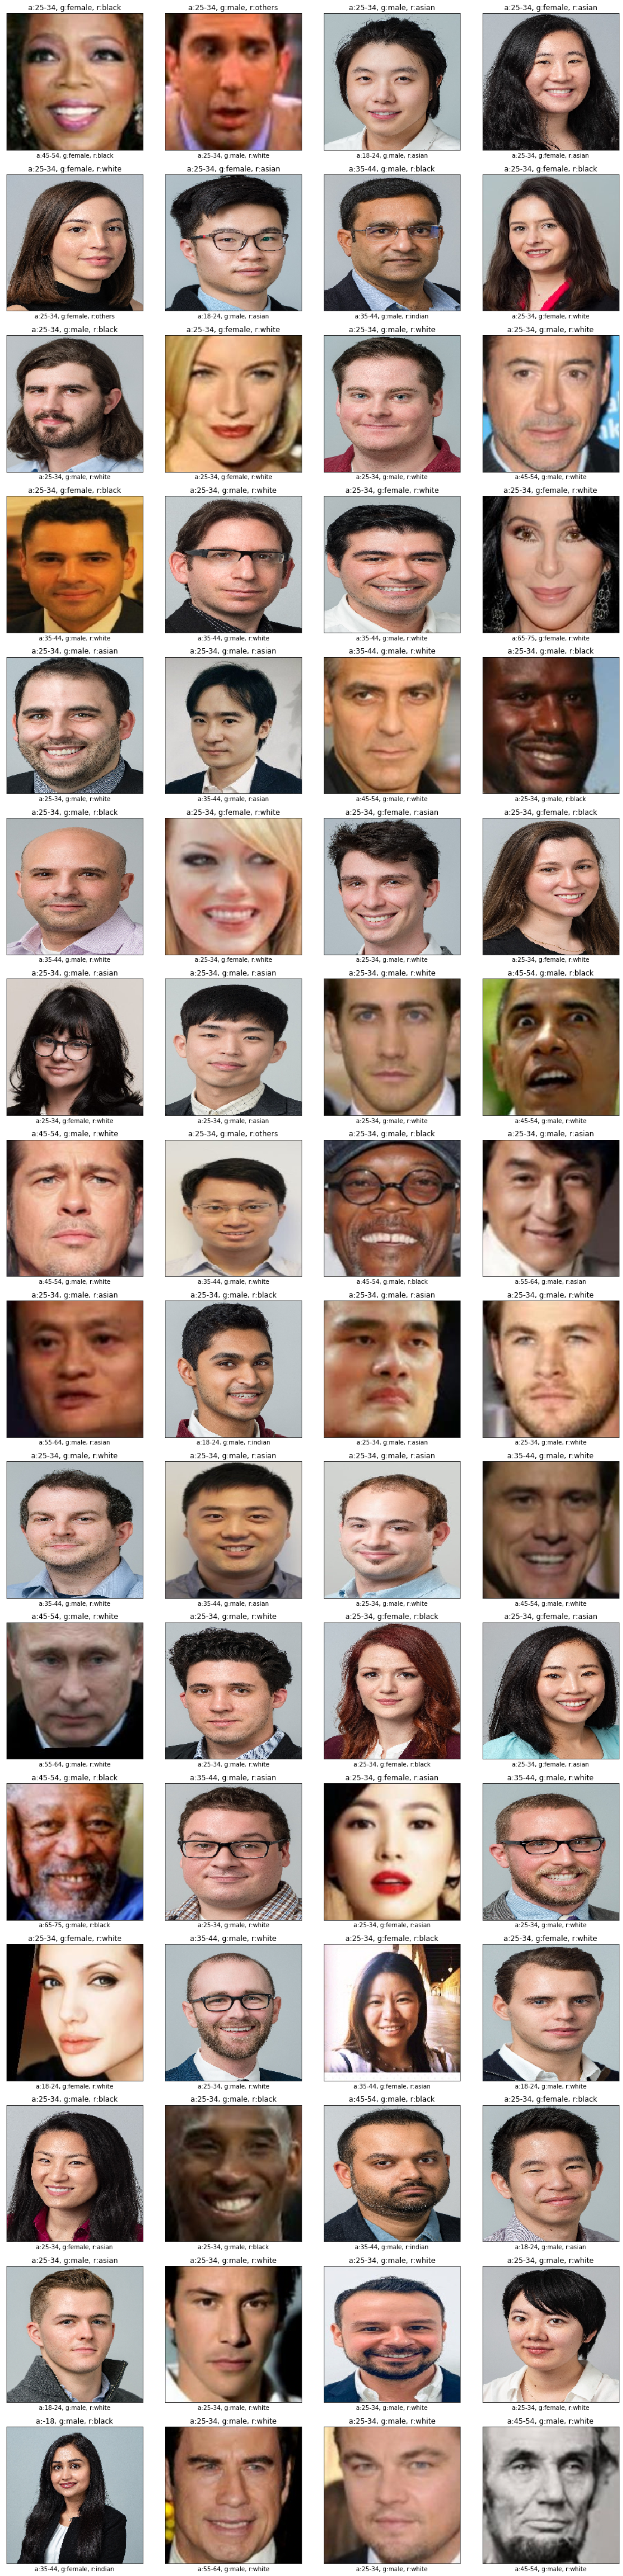

In [61]:
import math
n = 64
random_indices = np.random.permutation(n)
n_cols = 4
n_rows = math.ceil(n / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 60))
for i, img_idx in enumerate(random_indices):
    ax = axes.flat[i]
    ax.imshow(x_test_list[img_idx])
    ax.set_title('a:{}, g:{}, r:{}'.format(age_pred_list[img_idx], gender_pred_list[img_idx], race_pred_list[img_idx]))
    ax.set_xlabel('a:{}, g:{}, r:{}'.format(age_true_list[img_idx], gender_true_list[img_idx], race_true_list[img_idx]))
    ax.set_xticks([])
    ax.set_yticks([])
save_fig('test_output')

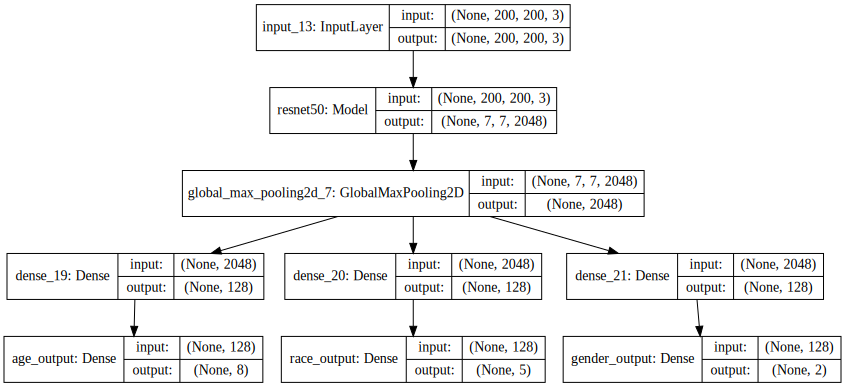

In [543]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [292]:

ResNet50_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [293]:
conv_base.trainable = False